## Import The Function

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


## Process The Data

In [48]:
def prepare_data():
    print("Downloading MNIST dataset...")
    mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='auto')
    
    X = mnist.data.astype('float32') / 255.0
    y = mnist.target.astype('float')

    X_train = X[0:1000]
    y_train = y[0:1000]

    X_test = X[-20:]
    y_test = y[-20:]

    return X_train, y_train, X_test, y_test

In [49]:
def create_and_train_ffnn(X_train, y_train):
    ffnn = MLPClassifier(
        hidden_layer_sizes=(5, 5),      
        activation='relu',                
        solver='adam',                    
        learning_rate_init=0.1,           
        max_iter=2,                     
        random_state=42,                  
    )

    ffnn.fit(X_train, y_train)
    
    return ffnn

In [50]:
def evaluate_model(ffnn, X_test, y_test):
    y_pred = ffnn.predict(X_test)

    print(y_pred)

    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    print(f"\nAccuracy: {accuracy_score(y_test, y_pred):.2f}")

In [51]:
def visualize_predictions(X_test, y_test, y_pred):
    fig, axes = plt.subplots(3, 5, figsize=(12, 7))
    axes = axes.ravel()

    for i in range(15):
        img = X_test[i].reshape(28, 28)

        axes[i].imshow(img, cmap='gray')

        if y_test[i] == y_pred[i]:
            color = 'green'
        else:
            color = 'red'

        axes[i].set_title(f'True: {y_test[i]}, Pred: {y_pred[i]}', color=color, fontsize=10)
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predic

[1. 7. 7. 1. 7. 1. 1. 7. 1. 1. 1. 1. 1. 1. 7. 1. 1. 1. 7. 1.]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       2.0
         1.0       0.00      0.00      0.00       2.0
         2.0       0.00      0.00      0.00       3.0
         3.0       0.00      0.00      0.00       2.0
         4.0       0.00      0.00      0.00       2.0
         5.0       0.00      0.00      0.00       3.0
         6.0       0.00      0.00      0.00       3.0
         7.0       0.00      0.00      0.00       1.0
         8.0       0.00      0.00      0.00       1.0
         9.0       0.00      0.00      0.00       1.0

    accuracy                           0.00      20.0
   macro avg       0.00      0.00      0.00      20.0
weighted avg       0.00      0.00      0.00      20.0


Confusion Matrix:
[[0 2 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 0]
 [0 3 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 1 0 0]
 [0 1 0 0 0 0 0 2 0 0]

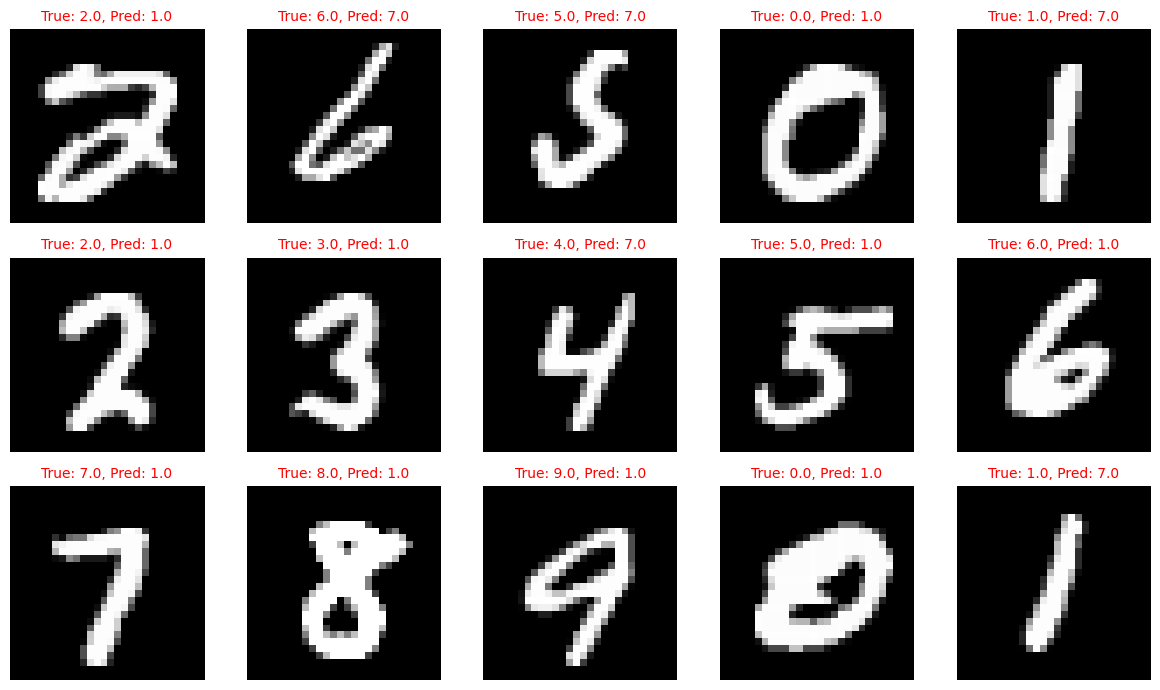

In [52]:
def main():
    X_train, y_train, X_test, y_test = prepare_data()

    ffnn = create_and_train_ffnn(X_train, y_train)

    evaluate_model(ffnn, X_test, y_test)

    y_pred = ffnn.predict(X_test)
    visualize_predictions(X_test, y_test, y_pred)


if __name__ == '__main__':
    main()